# Python super()函数：调用父类的构造方法
Python 的子类也会继承得到父类的构造方法，但如果子类有多个直接父类，那么会优先选择排在最前面的父类的构造方法。例如如下代码：

####  问题
你想在子类中调用父类的某个已经被覆盖的方法。

#### 解决方案
为了调用父类(超类)的一个方法，可以使用 super() 函数，比如：

In [1]:
class A:
    def spam(self):
        print('A.spam')

class B(A):
    def spam(self):
        print('B.spam')
        super().spam()  # Call parent spam()

super() 函数的一个常见用法是在 __init__() 方法中确保父类被正确的初始化了：

In [2]:
class A:
    def __init__(self):
        self.x = 0

class B(A):
    def __init__(self):
        super().__init__()
        self.y = 1

super() 的另外一个常见用法出现在覆盖Python特殊方法的代码中，比如：

In [3]:
class Proxy:
    def __init__(self, obj):
        self._obj = obj

    # Delegate attribute lookup to internal obj
    def __getattr__(self, name):
        return getattr(self._obj, name)

    # Delegate attribute assignment
    def __setattr__(self, name, value):
        if name.startswith('_'):
            super().__setattr__(name, value) # Call original __setattr__
        else:
            setattr(self._obj, name, value)

在上面代码中，\_\_setattr__() 的实现包含一个名字检查。 如果某个属性名以下划线(\_)开头，就通过 super() 调用原始的 \_\_setattr__() ， 否则的话就委派给内部的代理对象 self.\_obj 去处理。 这看上去有点意思，因为就算没有显式的指明某个类的父类， super() 仍然可以有效的工作。

<br />

实际上，大家对于在Python中如何正确使用 super() 函数普遍知之甚少。 你有时候会看到像下面这样直接调用父类的一个方法：

In [4]:
class Base:
    def __init__(self):
        print('Base.__init__')

class A(Base):
    def __init__(self):
        Base.__init__(self)
        print('A.__init__')

尽管对于大部分代码而言这么做没什么问题，但是在更复杂的涉及到多继承的代码中就有可能导致很奇怪的问题发生。 比如，考虑如下的情况：

In [5]:
class Base:
    def __init__(self):
        print('Base.__init__')

class A(Base):
    def __init__(self):
        Base.__init__(self)
        print('A.__init__')

class B(Base):
    def __init__(self):
        Base.__init__(self)
        print('B.__init__')

class C(A,B):
    def __init__(self):
        A.__init__(self)
        B.__init__(self)
        print('C.__init__')

如果你运行这段代码就会发现 Base.\_\_init__() 被调用两次，如下所示：

In [7]:
c = C()

Base.__init__
A.__init__
Base.__init__
B.__init__
C.__init__


可能两次调用 Base.__init__() 没什么坏处，但有时候却不是。 另一方面，假设你在代码中换成使用 super() ，结果就很完美了：

In [10]:
class Base:
    def __init__(self):
        print('Base.__init__')

class A(Base):
    def __init__(self):
        super().__init__()
        print('A.__init__')

class B(Base):
    def __init__(self):
        super().__init__()
        print('B.__init__')

class C(A,B):
    def __init__(self):
        super().__init__()  # Only one call to super() here
        print('C.__init__')

c = C()

Base.__init__
B.__init__
A.__init__
C.__init__


参看之后的MRO顺序

In [1]:
class Employee :
    def __init__ (self, salary):
        self.salary = salary
    def work (self):
        print('普通员工正在写代码，工资是:', self.salary)
class Customer:
    def __init__ (self, favorite, address):
        self.favorite = favorite
        self.address = address
    def info (self):
        print('我是一个顾客，我的爱好是: %s,地址是%s' % (self.favorite, self.address))
# Manager继承了Employee、Customer
class Manager (Employee, Customer):
    pass
m = Manager(25000)
m.work()  #①
#m.info()  #②

普通员工正在写代码，工资是: 25000


上面程序中第 13 行代码定义了 Manager 类，该类继承了 Employee 和 Customer 两个父类。接下来程序中的 Manager 类将会优先使用 Employee 类的构造方法（因为它排在前面），所以程序使用 Manager(25000）来创建 Manager 对象。该构造方法只会初始化 salary 实例变量，因此执行上面程序中 ① 号代码是没有任何问题的。

但是当执行到 ② 号代码时就会引发错误，这是由于程序在使用 Employee 类的构造方法创建 Manager 对象时，程序并未初始化 Customer 对象所需的两个实例变量：favorite 和 address，因此程序引发错误。

如果将程序中第 13 行代码改为如下形式：

如果将程序中第 13 行代码改为如下形式：

    class Manager (Customer, Employee)

上面 Manager 类将优先使用 Customer 类的构造方法，因此程序必须使用如下代码来创建 Manager 对象：

    m = Manager('IT 产品','广州')

上面代码为 Manager 的构造方法传入两个参数，这明显是调用从 Customer 类继承得到的两个构造方法，此时程序将可以初始化 Customer 类中的 favorite 和 address 实例变量，但它又不能初始化 Employee 类中的 salary 实例变量。因此，此时程序中的 ② 号代码可以正常运行，但 ① 号代码会报错。

为了让 Manager 能同时初始化两个父类中的实例变量，Manager 应该定义自己的构造方法，即重写父类的构造方法。Python 要求，如果子类重写了父类的构造方法，那么子类的构造方法必须调用父类的构造方法。

子类的构造方法调用父类的构造方法有两种方式：

1使用未绑定方法，这种方式很容易理解。因为构造方法也是实例方法，当然可以通过这种方式来调用。

2使用 super() 函数调用父类的构造方法。

注意，当子类继承多个父类是，super() 函数只能用来调用第一个父类的构造方法，而其它父类的构造方法只能使用未绑定的方式调用。

在交互式解释器中输入 help(super) 查看 super() 函数的帮助信息，可以看到如下输出信息：

In [3]:
help(super)

Help on class super in module builtins:

class super(object)
 |  super() -> same as super(__class__, <first argument>)
 |  super(type) -> unbound super object
 |  super(type, obj) -> bound super object; requires isinstance(obj, type)
 |  super(type, type2) -> bound super object; requires issubclass(type2, type)
 |  Typical use to call a cooperative superclass method:
 |  class C(B):
 |      def meth(self, arg):
 |          super().meth(arg)
 |  This works for class methods too:
 |  class C(B):
 |      @classmethod
 |      def cmeth(cls, arg):
 |          super().cmeth(arg)
 |  
 |  Methods defined here:
 |  
 |  __get__(self, instance, owner, /)
 |      Return an attribute of instance, which is of type owner.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new obje

In [ ]:
class super(object)
|  super() -> same as super(__class__, <first argument>)
|  super(type) -> unbound super object
|  super(type, obj) -> bound super object; requires isinstance(obj, type)
|  super(type, type2) -> bound super object; requires issubclass(type2, type)
|  Typical use to call a cooperative superclass method:
|  class C(B):
|      def meth(self, arg):
|          super().meth(arg) #①
|  This works for class methods too:
|  class C(B):
|      @classmethod
|      def cmeth(cls, arg):
|          super().cmeth(arg) #②
...

从上面介绍可以看出，super 其实是一个类，因此调用 super() 的本质就是调用 super 类的构造方法来创建 super 对象。

从上面的帮助信息可以看到，使用 super() 构造方法最常用的做法就是不传入任何参数（这种做法与 super(type, obj) 的效果相同），然后通过 super 对象的方法既可调用父类的实例方法，也可调用父类的类方法。在调用父类的实例方法时，程序会完成第一个参数 self 的自动绑定，如上帮助信息中 ① 号信息所示。在调用类方法时，程序会完成第一个参数 cls 的自动绑定，如上面帮助信息中 ② 号信息所示。

掌握了 super() 函数的用法之后，接下来可以将上面程序改为如下形式：

In [4]:
# Manager继承了Employee、Customer
class Manager(Employee, Customer):
    # 重写父类的构造方法
    def __init__(self, salary, favorite, address):
        print('--Manager的构造方法--')
        # 通过super()函数调用父类的构造方法
        super().__init__(salary)
        # 与上一行代码的效果相同
        #super(Manager, self).__init__(salary)
        # 使用未绑定方法调用父类的构造方法
        Customer.__init__(self, favorite, address)
# 创建Manager对象
m = Manager(25000, 'IT产品', '广州')
m.work()  #①
m.info()  #②

--Manager的构造方法--
普通员工正在写代码，工资是: 25000
我是一个顾客，我的爱好是: IT产品,地址是广州


上面程序中，第 7、11 行代码分别示范了两种方式调用父类的构造方法。通过这种方式，Manager 类重写了父类的构造方法，并在构造方法中显式调用了父类的两个构造方法执行初始化，这样两个父类中的实例变量都能被初始化。

super() 函数是用于调用父类(超类)的一个方法。

super 是用来解决多重继承问题的，直接用类名调用父类方法在使用单继承的时候没问题，但是如果使用多继承，会涉及到查找顺序（MRO）、重复调用（钻石继承）等种种问题。

MRO 就是类的方法解析顺序表, 其实也就是继承父类方法时的顺序表。

In [6]:
class A:
     def add(self, x):
         y = x+1
         print(y)
class B(A):
    def add(self, x):
        super().add(x)
b = B()
b.add(2)  # 3

3


In [7]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
 
class FooParent(object):
    def __init__(self):
        self.parent = 'I\'m the parent.'
        print ('Parent')
    
    def bar(self,message):
        print ("%s from Parent" % message)
 
class FooChild(FooParent):
    def __init__(self):
        # super(FooChild,self) 首先找到 FooChild 的父类（就是类 FooParent），然后把类 FooChild 的对象转换为类 FooParent 的对象
        super(FooChild,self).__init__()    
        print ('Child')
        
    def bar(self,message):
        super(FooChild, self).bar(message)
        print ('Child bar fuction')
        print (self.parent)
 
if __name__ == '__main__':
    fooChild = FooChild()
    fooChild.bar('HelloWorld')

Parent
Child
HelloWorld from Parent
Child bar fuction
I'm the parent.


https://www.cnblogs.com/taosiyu/p/11343639.html

In [9]:
class A:
    def func(self):
        print('OldBoy')
 

class B(A):
    def func(self):
        super().func()
        print('LuffyCity')

A().func()
B().func()

OldBoy
OldBoy
LuffyCity


In [13]:

class Base:
    def __init__(self):
        print('Base.__init__')
 

class A(Base):
    def __init__(self):
        Base.__init__(self)
        print('A.__init__')


class B(Base):
    def __init__(self):
        Base.__init__(self)
        print('B.__init__')

class C(B, A):
    def __init__(self):
        A.__init__(self)
        B.__init__(self)
        print('C.__init__')



C()

Base.__init__
A.__init__
Base.__init__
B.__init__
C.__init__


In [20]:
class Base:
    def __init__(self):
        print('Base.__init__')
        
class A(Base):
    def __init__(self):
        super().__init__()
        print('A.__init__')
 
class B(Base):
    def __init__(self):
        super().__init__()
        print('B.__init__')

class C(Base):
    def __init__(self):
        super().__init__()
        print('C.__init__')

 
class D(A,B,C):
    def __init__(self):
        super().__init__()
        print('D.__init__')

print('A.mro: ', A.mro())
print('D.mro: ', D.mro())
 
# MRO的顺序是按照 子类，继承父类1，继承父类2,...，   即广度优先
D() #这个初始化顺序和MRO顺序不一样！！！
#Super 按照第一个参数去找参数，

A.mro:  [<class '__main__.A'>, <class '__main__.Base'>, <class 'object'>]
D.mro:  [<class '__main__.D'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.Base'>, <class 'object'>]
Base.__init__
C.__init__
B.__init__
A.__init__
D.__init__


# MRO排序

https://www.jianshu.com/p/6651ed35104c

在图论中，由一个有向无环图的顶点组成的序列，当且仅当满足下列条件时，称为该图的一个拓扑排序（英语：Topological sorting）。

1.每个顶点出现且只出现一次；

2.若A在序列中排在B的前面，则在图中不存在从B到A的路径。

图中每个点都是有指向性的：可能指向别人或者被别人指向。

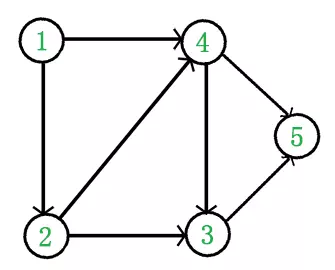


拓扑顺序就是：每次找到一个只指向别人的点 (学术性说法：入度为0)，记录下来；然后忽略掉这个点和它所指出去的线，再找到下一个只指向别人的点，记录下来，直到剩最后一个点，所有记录的点的顺序就是拓扑顺序

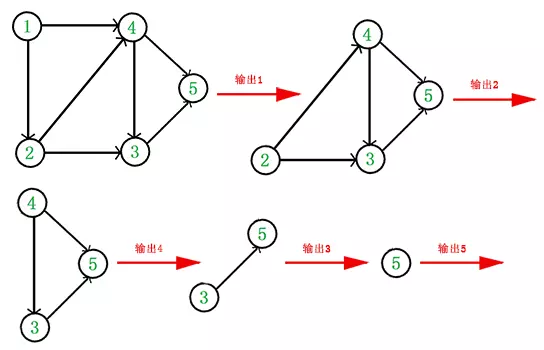

上图中，只有点1只指向别人，输出1；去掉点1和它伸出的两根线外只有点2只指向别人，输出2；...类推下去，得到拓扑排序结构: 1 2 4 3 5

MRO 排序应用了 C3 算法，想了解 C3 自己查吧...总之得到的结果类似于拓扑排序，下面有段简单的多继承代码和其对应的拓扑排序的抽象图 (所用代码实例和图片均来应用自别处，文章末尾有链接)

In [23]:
class D(object):
    pass

class E(object):
    pass
 
class F(object):
    pass
 
class C(D, F):
    pass
 
class B(E, D):
    pass
 
class A(B, C):
    pass
 
if __name__ == '__main__':
    print( A.mro())

[<class '__main__.A'>, <class '__main__.B'>, <class '__main__.E'>, <class '__main__.C'>, <class '__main__.D'>, <class '__main__.F'>, <class 'object'>]


下面就是抽象出来的图
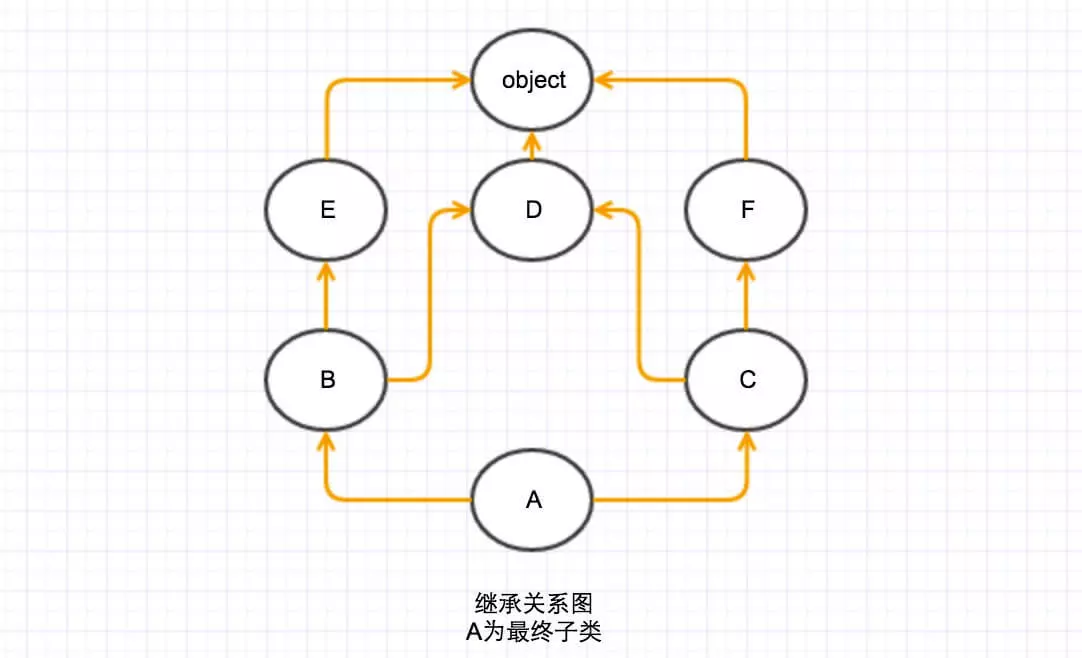

我们就用拓扑排序来分析，但是这里会碰到同时存在好几个点都是入度为0 (说人话，就是没有被别人指向的点)，这时按照树的排序来，即从左到右，从根到叶，这里 A 就是根。

所以具体情况就是：我们先找到了点 A只有它没有被别人指向，输出A；去掉A及其伸出的两条线，剩 B 和 C 点同时满足只指向别人，按照树的顺序从左到右，故先输出B；去掉线剩 E 和 C ，输出E ;去线剩 C，输出C；去线剩 D 和 F ，输出D；去线只剩F ，输出F；最后输出object;得到的输出结果：

    A B E C D F object

所以我们在类中使用super的时候参数是可以省略的。

第二种用法， super(type, obj) 传递一个类和对象，得到的是一个绑定的super对象。这还需要obj是type的实例，可以不是直接的实例，是子类的实例也行。


In [57]:
class Base:
    def __init__(self):
        print('Base.__init__')
        
class A(Base):
    def __init__(self):
        super().__init__()
        print('A.__init__')
 
class B(Base):
    def __init__(self):
        super().__init__()
        print('B.__init__')

class C(Base):
    def __init__(self):
        super().__init__()
        print('C.__init__')

 
class D(A,B,C):
    def __init__(self):
        super().__init__()
        print('D.__init__')

d = D()
print(D.mro())
#print(super(A, a))
#print(super(Base, a))

Base.__init__
C.__init__
B.__init__
A.__init__
D.__init__
[<class '__main__.D'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.Base'>, <class 'object'>]


第三种用法， super(type, type2)传递两个类，得到的也是一个绑定的super对象。这需要type2是type的子类。

In [27]:
print(super(Base, A))
print(super(Base, B))
print(super(Base, C))

<super: <class 'Base'>, <A object>>
<super: <class 'Base'>, <B object>>
<super: <class 'Base'>, <C object>>


# 查找顺序

接下来我们就该说说查找顺序了，两个参数，是按照那个参数去计算MRO呢？

我们将C类中的super的参数填写上，并且实例化，看看输出的结果。


In [36]:
class C(A, B):
    def __init__(self):
        super(C, self).__init__()
        print('C.__init__')
 
c = C()


Base.__init__
B.__init__
A.__init__
C.__init__


看结果和之前super没填参数的结果是一样的。

那我们将super的第一个参数改为A：


In [37]:
class C(A, B):
    def __init__(self):
        super(A, self).__init__()
        print('C.__init__')

c = C()


Base.__init__
B.__init__
C.__init__


咦！？那A.__init__怎么跑丢了呢？多出来了B.__init__呢？

这是应为Python是按照第二个参数来计算MRO，这次的参数是self，也就是C的MRO。在这个顺序中跳过一个参数（A）找后面一个类（B），执行他的方法。

知道这个后，输出的结果就可以理解了。

super(A, self).__init__() 没有执行Base的方法，而是执行了B的方法。


# 那我们接下来说说 super(type, obj)  和 super(type, type2)的区别。

代码如下：


In [38]:
class Base:
    def func(self):
        return 'from Base'

class A(Base):
    def func(self):
        return 'from A'

class B(Base):
    def func(self):
        return 'from B'

class C(A, B):
    def func(self):
        return 'from C'

c_obj = C()

print(super(C, C))

print(super(C, c_obj))

<super: <class 'C'>, <C object>>
<super: <class 'C'>, <C object>>


两次的打印结果一模一样，verygood。那他们的方法是否是一样的呢？测试一下

In [39]:
print(super(C, C).func is super(C, c_obj).func)

print(super(C, C).func == super(C, c_obj).func)

False
False


他俩的方法既不是指向同一个，值还不相等。是不是搞错了呢？再试试下面的看看。

In [40]:
c1 = super(C, C)
c2 = super(C, C)

print(c1 is c2)
print(c1 == c2)

print(c1.func is c2.func)
print(c1.func == c2.func)

False
False
True
True


 c1和c2不是一个对象，但是他们的方法却是相同的。

那 super(C, C).func 和 super(C, c_obj).func 的确是不同的。那打印出来看看有什么区别


In [41]:
print(super(C, C).func)

print(super(C, c_obj).func)

<function A.func at 0x0000012BBE5EC510>
<bound method A.func of <__main__.C object at 0x0000012BBE4353C8>>


super的第二个参数传递的是类，得到的是函数。

super的第二个参数传递的是对象，得到的是绑定方法。

函数和绑定方法的区别就不再赘述了，在这里想得到一样的结果，只需要给函数传递一个参数，而绑定方法则不需要传递额外的参数了。


In [44]:
print(super(C, C).func(c_obj))

print(super(C, c_obj).func())

from A
from A


# 总结

1.super()使用的时候需要传递两个参数，在类中可以省略不写，我们使用super()来找父类或者兄弟类的方法；

2.super()是根据第二个参数来计算MRO，根据顺序查找第一个参数类后的方法。

3.super()第二个参数是类，得到的方法是函数，使用时要传self参数。第二个参数是对象，得到的是绑定方法，不需要再传self参数。

给使用super()的一些建议：

1.super()调用的方法要存在；

2.传递参数的时候，尽量使用**args 与***kwargs；

3.父类中的一些特性，比如【】、重写了__getattr__，super对象是不能使用的。

4.super()第二个参数传的是类的时候，建议调用父类的类方法和静态方法。
